In [1]:
import pandas as pd
import numpy as np

# Import classifiers
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# metrics contain our plot_confustion_matrix and classification_report
from sklearn import metrics

# Helper fuction to splitting data
from sklearn.model_selection import train_test_split

# IF YOU GET AN ERROR HERE run: pip install scikit-image
from skimage import io
from skimage.color import rgb2gray


import seaborn as sns
sns.set()

# For plotting
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
df = pd.read_csv('data/Fire_Incident_Dispatch_Data.csv',nrows=10000)
df.head()

,STARFIRE_INCIDENT_ID,INCIDENT_DATETIME,ALARM_BOX_BOROUGH,ALARM_BOX_NUMBER,ALARM_BOX_LOCATION,INCIDENT_BOROUGH,ZIPCODE,POLICEPRECINCT,CITYCOUNCILDISTRICT,COMMUNITYDISTRICT,...,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,INCIDENT_CLOSE_DATETIME,VALID_DISPATCH_RSPNS_TIME_INDC,VALID_INCIDENT_RSPNS_TIME_INDC,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,ENGINES_ASSIGNED_QUANTITY,LADDERS_ASSIGNED_QUANTITY,OTHER_UNITS_ASSIGNED_QUANTITY
0,500127850130001,01/01/2005 12:00:01 AM,RICHMOND / STATEN ISLAND,2785,MERRYMOUNT ST & NOME AVE,RICHMOND / STATEN ISLAND,10314.0,121.0,51.0,502.0,...,01/01/2005 12:00:56 AM,01/01/2005 12:06:38 AM,01/01/2005 12:15:56 AM,N,Y,397,357,1,1,0
1,500133070120471,01/01/2005 12:00:03 AM,BRONX,3307,ARTHUR AVE & 183 ST,BRONX,10458.0,48.0,15.0,206.0,...,01/01/2005 12:01:51 AM,01/01/2005 12:04:23 AM,01/01/2005 12:07:03 AM,N,Y,260,250,1,0,0
2,500103630140001,01/01/2005 12:01:02 AM,BROOKLYN,363,TOMPKINS & PARK AVES,BROOKLYN,11206.0,79.0,36.0,303.0,...,01/01/2005 12:01:25 AM,01/01/2005 12:03:28 AM,01/01/2005 12:13:20 AM,N,Y,146,139,1,0,0
3,500175150150001,01/01/2005 12:01:42 AM,QUEENS,7515,ASTORIA BLVD AND 2ND ST,QUEENS,11102.0,114.0,22.0,401.0,...,01/01/2005 12:02:51 AM,01/01/2005 12:07:09 AM,01/01/2005 12:08:27 AM,N,Y,327,275,3,2,1
4,500171620150003,01/01/2005 12:01:45 AM,QUEENS,7162,JACKSON & 42 RD,QUEENS,11101.0,108.0,26.0,402.0,...,01/01/2005 12:04:12 AM,01/01/2005 12:08:16 AM,01/01/2005 12:24:37 AM,N,Y,391,279,1,1,1


In [3]:
df.shape

(10000, 29)

In [4]:
df.isnull().sum()

STARFIRE_INCIDENT_ID                 0
INCIDENT_DATETIME                    0
ALARM_BOX_BOROUGH                    0
ALARM_BOX_NUMBER                     0
ALARM_BOX_LOCATION                   0
INCIDENT_BOROUGH                     0
ZIPCODE                            621
POLICEPRECINCT                     621
CITYCOUNCILDISTRICT                621
COMMUNITYDISTRICT                  621
COMMUNITYSCHOOLDISTRICT            629
CONGRESSIONALDISTRICT              621
ALARM_SOURCE_DESCRIPTION_TX          0
ALARM_LEVEL_INDEX_DESCRIPTION        0
HIGHEST_ALARM_LEVEL                  0
INCIDENT_CLASSIFICATION              0
INCIDENT_CLASSIFICATION_GROUP        0
DISPATCH_RESPONSE_SECONDS_QY         0
FIRST_ASSIGNMENT_DATETIME           43
FIRST_ACTIVATION_DATETIME           66
FIRST_ON_SCENE_DATETIME           1203
INCIDENT_CLOSE_DATETIME              0
VALID_DISPATCH_RSPNS_TIME_INDC       0
VALID_INCIDENT_RSPNS_TIME_INDC       0
INCIDENT_RESPONSE_SECONDS_QY         0
INCIDENT_TRAVEL_TM_SECOND

In [5]:
df.duplicated().sum()

0

In [6]:
df = df.dropna()
df = df.drop_duplicates()
df.isnull().sum()
df.duplicated().sum()

0

<AxesSubplot:xlabel='INCIDENT_BOROUGH'>

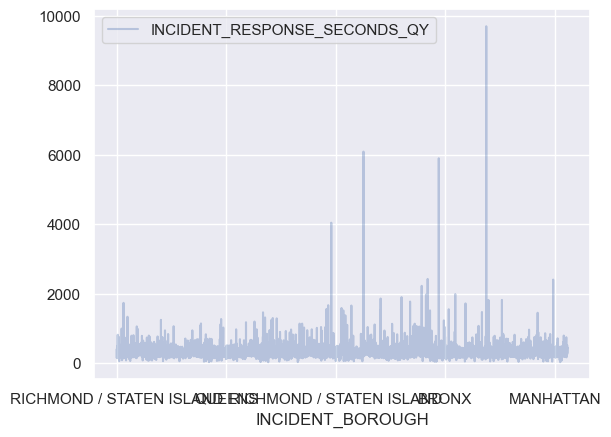

In [7]:
df.plot(kind='line', x='INCIDENT_BOROUGH', y='INCIDENT_RESPONSE_SECONDS_QY', alpha=0.33)

In [8]:
df['INCIDENT_BOROUGH'].value_counts()

BROOKLYN                    2479
MANHATTAN                   2142
BRONX                       1640
QUEENS                      1571
RICHMOND / STATEN ISLAND     402
Name: INCIDENT_BOROUGH, dtype: int64

In [9]:
df.describe()

,STARFIRE_INCIDENT_ID,ALARM_BOX_NUMBER,ZIPCODE,POLICEPRECINCT,CITYCOUNCILDISTRICT,COMMUNITYDISTRICT,COMMUNITYSCHOOLDISTRICT,CONGRESSIONALDISTRICT,DISPATCH_RESPONSE_SECONDS_QY,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,ENGINES_ASSIGNED_QUANTITY,LADDERS_ASSIGNED_QUANTITY,OTHER_UNITS_ASSIGNED_QUANTITY
count,8.234000e+03,8234.000000,8234.000000,8234.000000,8234.000000,8234.000000,8234.000000,8234.000000,8234.000000,8234.000000,8234.000000,8234.000000,8234.000000,8234.000000
mean,5.004531e+14,2713.021982,10744.212169,62.567525,23.620598,264.287952,15.047122,10.493928,57.266699,322.260505,264.982269,1.500121,0.860700,0.481297
std,2.421356e+11,2250.562832,555.549389,34.543405,15.318001,120.177375,9.777779,3.232446,146.080417,206.946741,149.205417,1.200252,0.954142,1.064290
min,5.001002e+14,15.000000,10001.000000,1.000000,1.000000,101.000000,1.000000,3.000000,4.000000,24.000000,1.000000,0.000000,0.000000,0.000000
25%,5.002376e+14,1037.000000,10065.000000,34.000000,9.000000,112.000000,6.000000,8.000000,13.000000,239.000000,190.000000,1.000000,0.000000,0.000000
50%,5.004317e+14,2153.000000,10474.000000,62.000000,22.000000,303.000000,14.000000,11.000000,49.000000,294.000000,241.000000,1.000000,1.000000,0.000000
75%,5.006333e+14,3556.000000,11226.000000,90.000000,37.000000,318.000000,24.000000,13.000000,72.000000,362.000000,308.000000,2.000000,2.000000,1.000000
max,5.079102e+14,9927.000000,11697.000000,123.000000,51.000000,595.000000,32.000000,16.000000,9549.000000,9700.000000,6008.000000,24.000000,12.000000,22.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8234 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   STARFIRE_INCIDENT_ID            8234 non-null   int64  
 1   INCIDENT_DATETIME               8234 non-null   object 
 2   ALARM_BOX_BOROUGH               8234 non-null   object 
 3   ALARM_BOX_NUMBER                8234 non-null   int64  
 4   ALARM_BOX_LOCATION              8234 non-null   object 
 5   INCIDENT_BOROUGH                8234 non-null   object 
 6   ZIPCODE                         8234 non-null   float64
 7   POLICEPRECINCT                  8234 non-null   float64
 8   CITYCOUNCILDISTRICT             8234 non-null   float64
 9   COMMUNITYDISTRICT               8234 non-null   float64
 10  COMMUNITYSCHOOLDISTRICT         8234 non-null   float64
 11  CONGRESSIONALDISTRICT           8234 non-null   float64
 12  ALARM_SOURCE_DESCRIPTION_TX     82

<Figure size 1300x800 with 0 Axes>

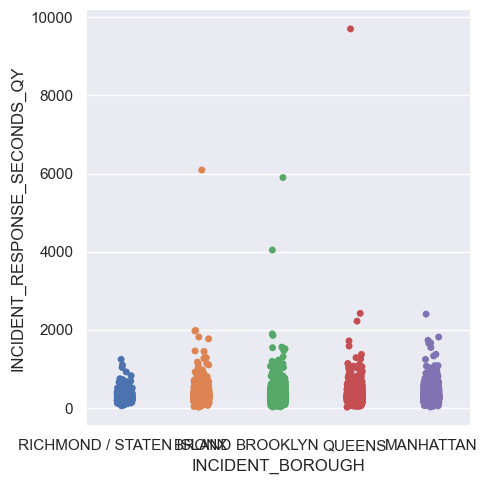

In [11]:
plt.figure(figsize=(13,8))
sns.catplot(data=df,x='INCIDENT_BOROUGH', y='INCIDENT_RESPONSE_SECONDS_QY')

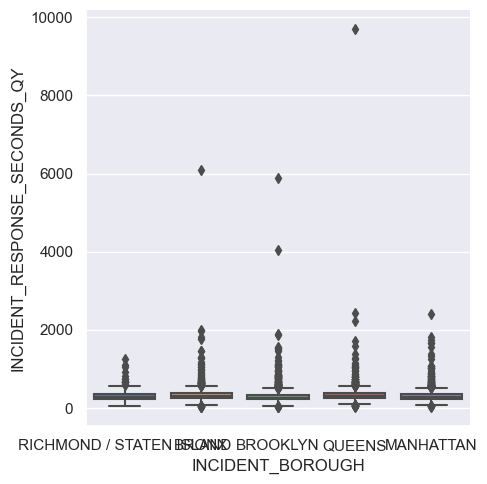

In [12]:
sns.catplot(data=df, x="INCIDENT_BOROUGH", y="INCIDENT_RESPONSE_SECONDS_QY", kind="box")

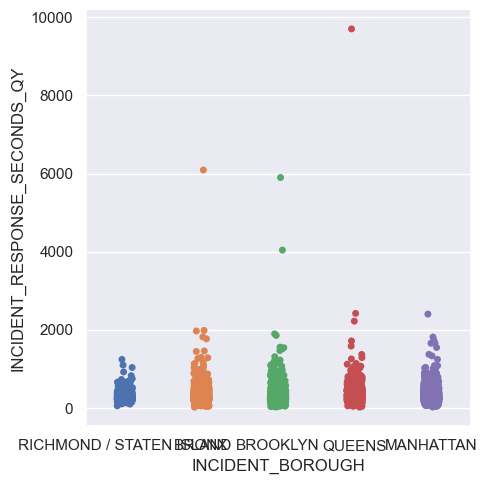

In [13]:
sec_shrink = df['INCIDENT_RESPONSE_SECONDS_QY'] < 100000

df_alpha = df[sec_shrink]


sns.catplot(data=df_alpha,x='INCIDENT_BOROUGH', y='INCIDENT_RESPONSE_SECONDS_QY')

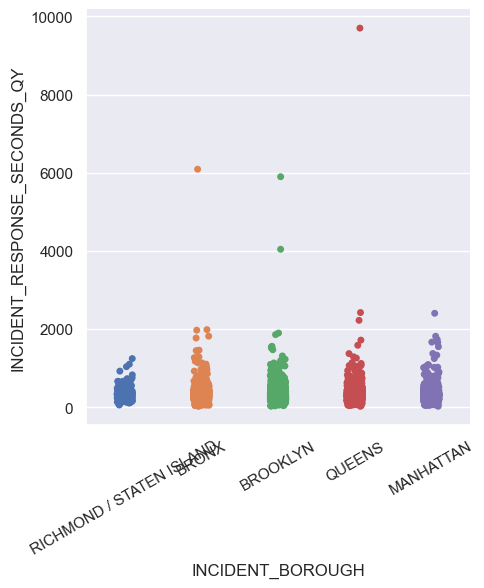

In [14]:
sec_shrink2 = df['INCIDENT_RESPONSE_SECONDS_QY'] < 30000

df_beta = df[sec_shrink2]


ax = sns.catplot(data=df_beta,x='INCIDENT_BOROUGH', y='INCIDENT_RESPONSE_SECONDS_QY')
ax.set_xticklabels(rotation=30)

In [15]:
gb = df.groupby(['ZIPCODE','INCIDENT_BOROUGH'])
gb.count()

STARFIRE_INCIDENT_ID  INCIDENT_DATETIME  \
ZIPCODE INCIDENT_BOROUGH                                            
10001.0 MANHATTAN                           75                 75   
10002.0 BRONX                                1                  1   
        MANHATTAN                           85                 85   
10003.0 MANHATTAN                           86                 86   
10004.0 MANHATTAN                           10                 10   
...                                        ...                ...   
11691.0 QUEENS                              78                 78   
11692.0 QUEENS                              22                 22   
11693.0 QUEENS                               5                  5   
11694.0 QUEENS                              21                 21   
11697.0 QUEENS                               2                  2   

                          ALARM_BOX_BOROUGH  ALARM_BOX_NUMBER  \
ZIPCODE INCIDENT_BOROUGH                                        
10001.0 MANHATTAN                        75                75   
10002.0 BRONX                             1                 1   
        MANHATTAN                        85                85   
10003.0 MANHATTAN                        86                86   
10004.0 MANHATTAN                        10                10   
...                                     ...               ...   
11691.0 QUEENS                           78                78   
11692.0 QUEENS                           22                22   
11693.0 QUEENS                            5                 5   
11694.0 QUEENS                           21                21   
11697.0 QUEENS                            2                 2   

                          ALARM_BOX_LOCATION  POLICEPRECINCT  \
ZIPCODE INCIDENT_BOROUGH                                       
10001.0 MANHATTAN                         75              75   
10002.0 BRONX                              1               1   
        MANHATTAN                         85              85   
10003.0 MANHATTAN                         86              86   
10004.0 MANHATTAN                         10              10   
...                                      ...             ...   
11691.0 QUEENS                            78              78   
11692.0 QUEENS                            22              22   
11693.0 QUEENS                             5               5   
11694.0 QUEENS                            21              21   
11697.0 QUEENS                             2               2   

                          CITYCOUNCILDISTRICT  COMMUNITYDISTRICT  \
ZIPCODE INCIDENT_BOROUGH                                           
10001.0 MANHATTAN                          75                 75   
10002.0 BRONX                               1                  1   
        MANHATTAN                          85                 85   
10003.0 MANHATTAN                          86                 86   
10004.0 MANHATTAN                          10                 10   
...                                       ...                ...   
11691.0 QUEENS                             78                 78   
11692.0 QUEENS                             22                 22   
11693.0 QUEENS                              5                  5   
11694.0 QUEENS                             21                 21   
11697.0 QUEENS                              2                  2   

                          COMMUNITYSCHOOLDISTRICT  CONGRESSIONALDISTRICT  ...  \
ZIPCODE INCIDENT_BOROUGH                                                  ...   
10001.0 MANHATTAN                              75                     75  ...   
10002.0 BRONX                                   1                      1  ...   
        MANHATTAN                              85                     85  ...   
10003.0 MANHATTAN                              86                     86  ...   
10004.0 MANHATTAN                              10                     10  ... 

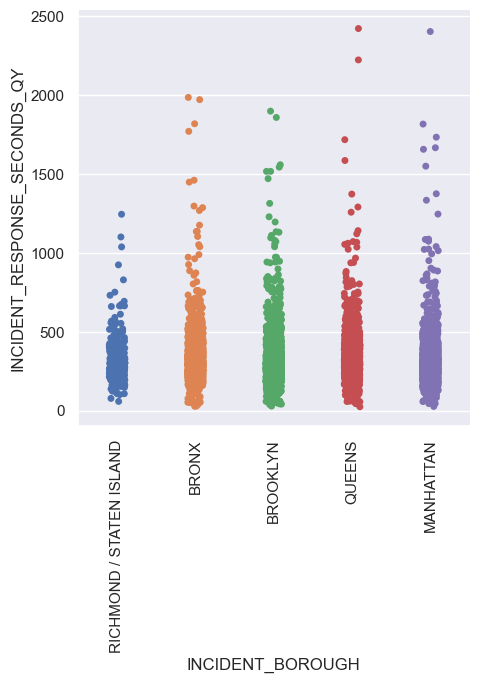

In [20]:
sec_shrink3 = df['INCIDENT_RESPONSE_SECONDS_QY'] < 2500

df_beta2 = df[sec_shrink3]

ax = sns.catplot(data=df_beta2,x='INCIDENT_BOROUGH', y='INCIDENT_RESPONSE_SECONDS_QY')
ax.set_xticklabels(rotation=90)

